In [19]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import sympy as sp
import handcalcs.render
import forallpeople as si
import matplotlib.pyplot as plt
import random
%matplotlib inline
from math import tan, sin,cos, pi, radians, sqrt, trunc
from IPython.display import display, Markdown
si.environment('thermal', top_level=True)

In [20]:
cp = pd.read_excel('Compartments.xlsx')

In [21]:
cp

,Compartment,Af,H,q,O,b
0,Parking garage,363.69,2.80,303,0.020,1365.00
1,"Cafeteria, Delivery area, Trash area",377.61,4.00,200,0.043,813.32
2,Entrance and lounge,328.85,4.00,200,0.049,838.42
3,Atrium,417.82,4.00,150,0.120,800.00
4,Student/Office workplaces,377.61,3.43,200,0.020,851.81
5,Auditorium,359.55,4.00,200,0.036,882.33
6,Skybar,377.61,3.93,200,0.020,821.01
7,Gym,286.70,3.93,200,0.020,816.97


In [22]:
cp['t_max'] = 0.0078*cp['q']/cp['O']
cp['gamma'] = (cp['O']/cp['b'])**2/(0.04/1160)**2
#create empty column called T_max
cp['T_max'] = 0

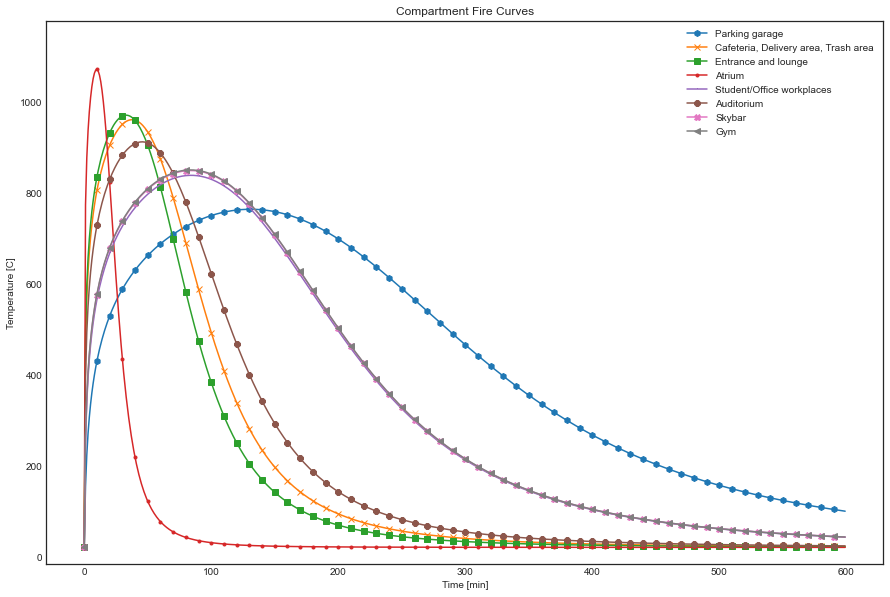

In [23]:
#markers list
markers = ['o', '^', 's', '*', 'D', 'v', 'p', 'h', 'H', 'd', 'P', 'X', '8', '<', '>', '|', '_', '+', 'x', '.', ',']
#iterate through each compartment
for i in range(len(cp)):
    #calculate the temperature of the compartment
    t = np.arange(0,600)
    T = 20+345*np.log10(8*cp['gamma'][i]*t+1)/(1+0.04*(t/cp['t_max'][i])**3.5)
    #create column with max temperature
    cp['T_max'][i] = T.max()
    #plot the temperature of the compartment
    plt.style.use('seaborn-white')
    plt.plot(t,T, label=cp['Compartment'][i],marker=random.choice(markers), markevery=10)
    #make y limit of the plot the same as the max temperature * 1.2
    plt.ylim(ymax=max(cp['T_max'])*1.1)
    plt.xlabel('Time [min]')
    plt.ylabel('Temperature [C]')
    plt.title('Compartment Fire Curves')
    plt.legend()
    #make graph look bigger
    plt.gcf().set_size_inches(15,10)
    
    

    #mark max temperature on each graph
    #plt.annotate(str(round(cp['T_max'][i],2)), xy=(t[T.argmax()],T.max()), xytext=(t[T.argmax()],T.max()))
    
    

In [24]:
cp

,Compartment,Af,H,q,O,b,t_max,gamma,T_max
0,Parking garage,363.69,2.80,303,0.020,1365.00,118.170000,0.180547,763.669066
1,"Cafeteria, Delivery area, Trash area",377.61,4.00,200,0.043,813.32,36.279070,2.350769,960.617744
2,Entrance and lounge,328.85,4.00,200,0.049,838.42,31.836735,2.872532,970.637629
3,Atrium,417.82,4.00,150,0.120,800.00,9.750000,18.922500,1071.275248
4,Student/Office workplaces,377.61,3.43,200,0.020,851.81,78.000000,0.463629,838.325339
5,Auditorium,359.55,4.00,200,0.036,882.33,43.333333,1.400035,911.953830
6,Skybar,377.61,3.93,200,0.020,821.01,78.000000,0.499067,848.785070
7,Gym,286.70,3.93,200,0.020,816.97,78.000000,0.504015,850.186265
